> **Import all the libraries :**

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

> **Loading Data :**

In [23]:
df = pd.read_csv('/kaggle/input/principal-component-analysis/Longley (1).csv')

In [24]:
df

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Employed
0,83.0,234.289,235.6,159.0,107.608,60.323
1,88.5,259.426,232.5,145.6,108.632,61.122
2,88.2,258.054,368.2,161.6,109.773,60.171
3,89.5,284.599,335.1,165.0,110.929,61.187
4,96.2,328.975,209.9,309.9,112.075,63.221
5,98.1,346.999,193.2,359.4,113.270,63.639
6,99.0,365.385,187.0,354.7,115.094,64.989
7,100.0,363.112,357.8,335.0,116.219,63.761
8,101.2,397.469,290.4,304.8,117.388,66.019
9,104.6,419.180,282.2,285.7,118.734,67.857


In [25]:
df.dtypes

GNP.deflator    float64
GNP             float64
Unemployed      float64
Armed.Forces    float64
Population      float64
Employed        float64
dtype: object

In [26]:
X = df.drop('Employed', axis=1)
Y = df['Employed']

In [27]:
correlation = df.corr()
correlation

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Employed
GNP.deflator,1.000000,0.991589,0.620633,0.464744,0.979163,0.970899
GNP,0.991589,1.000000,0.604261,0.446437,0.991090,0.983552
Unemployed,0.620633,0.604261,1.000000,-0.177421,0.686552,0.502498
Armed.Forces,0.464744,0.446437,-0.177421,1.000000,0.364416,0.457307
Population,0.979163,0.991090,0.686552,0.364416,1.000000,0.960391
Employed,0.970899,0.983552,0.502498,0.457307,0.960391,1.000000


> **Apply PCA :**

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
# Scale data before applying PCA
scaling=StandardScaler()

In [30]:
# Use fit and transform method
scaling.fit(df)
Scaled_data=scaling.transform(df)

In [31]:
from sklearn.decomposition import PCA

In [32]:
# Set the n_components=3
principal=PCA(n_components=3)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)

In [33]:
# Check the dimensions of data after PCA
print(x.shape)

(16, 3)


> **Check Components :**

In [34]:
# Check the values of eigen vectors
# prodeced by principal components
principal.components_

array([[-0.46695493, -0.46748987, -0.30646472, -0.21200613, -0.46560556,
        -0.45579661],
       [ 0.02628724,  0.02306569, -0.62227098,  0.77353962, -0.07624745,
         0.08589854],
       [-0.04906877, -0.16405382,  0.67228378,  0.58400807, -0.09179226,
        -0.41136586]])

> **Plot the components (Visualization) :**

Text(0, 0.5, 'pc2')

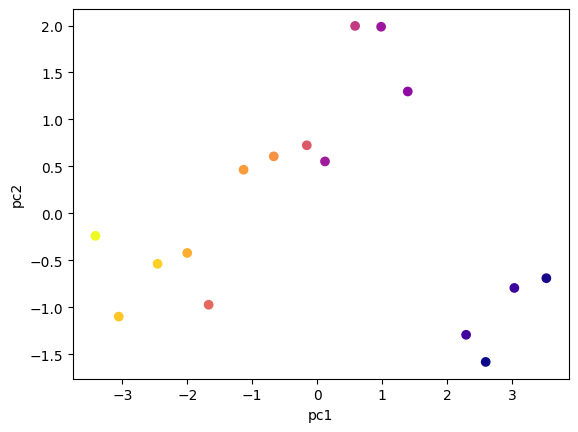

In [35]:
# plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1],c=df['Employed'],cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

> **Calculate variance ratio :**

In [36]:
# check how much variance is explained by each principal component
print(principal.explained_variance_ratio_)

[0.75584735 0.19778211 0.0419845 ]
